# Intro
FBref free data is a bit limited in terms of advanced data. This notebook shows some advanced analysis consisting on passing, shooting, ... visualizations.

## Statsbomb
Another football data provider very important is [statsbomb](https://statsbomb.com/). They offer different data plans, and also, a set of free data based on past seasons football. They have developed packages in different languages to access this data easily. In this case, the *Python* wrapper [statsbombpy](https://github.com/statsbomb/statsbombpy) provides an interface to obtain different types of data.

Following my project's background, I'll choose the advanced data corresponding to the latest season of *FA Women's Super League*.

# Obtaining the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

from mplsoccer import Pitch
from matplotlib.colors import to_rgba
from ast import literal_eval
from statsbombpy import sb
# As we are accessing free data, we dont need authorization
# So, avoid NoAuthWarning
warnings.simplefilter(action='ignore', category=sb.api_client.NoAuthWarning)
comps = sb.competitions()
comps.head()

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,16,4,Europe,Champions League,male,False,False,2018/2019,2022-08-14T16:57:15.866765,2021-06-13T16:17:31.694,None,2022-08-14T16:57:15.866765
1,16,1,Europe,Champions League,male,False,False,2017/2018,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-01-23T21:55:30.425330
2,16,2,Europe,Champions League,male,False,False,2016/2017,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
3,16,27,Europe,Champions League,male,False,False,2015/2016,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
4,16,26,Europe,Champions League,male,False,False,2014/2015,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00


In [2]:
# Lets see female leagues available
comps[comps['competition_gender']=='female']

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
15,37,90,England,FA Women's Super League,female,False,False,2020/2021,2022-08-16T02:10:37.220648,2021-06-13T16:17:31.694,None,2022-08-16T02:10:37.220648
16,37,42,England,FA Women's Super League,female,False,False,2019/2020,2021-06-01T13:01:18.188,2021-06-13T16:17:31.694,None,2021-06-01T13:01:18.188
17,37,4,England,FA Women's Super League,female,False,False,2018/2019,2022-09-12T21:06:25.061309,2021-06-13T16:17:31.694,None,2022-09-12T21:06:25.061309
37,49,3,United States of America,NWSL,female,False,False,2018,2021-11-06T05:53:29.435016,2021-06-13T16:17:31.694,None,2021-11-06T05:53:29.435016
40,53,106,Europe,UEFA Women's Euro,female,False,True,2022,2022-08-01T07:46:11.595364,2022-09-13T17:04:11.418708,2022-09-13T17:04:11.418708,2022-08-01T07:46:11.595364
41,72,30,International,Women's World Cup,female,False,True,2019,2022-07-13T20:21:27.033445,2021-06-13T16:17:31.694,None,2022-07-13T20:21:27.033445


In [3]:
# Select WSL seasons
wsl_seasons = comps[comps['competition_name'] == 'FA Women\'s Super League'].loc[:,['competition_id', 'season_id', 'competition_name', 'season_name']]
wsl_seasons

,competition_id,season_id,competition_name,season_name
15,37,90,FA Women's Super League,2020/2021
16,37,42,FA Women's Super League,2019/2020
17,37,4,FA Women's Super League,2018/2019


In [4]:
# Select matches
wsl_matches = sb.matches(competition_id=37, season_id=90)
wsl_matches.to_csv('datasets/sb_matches.csv', index=False)
wsl_matches['match_id'][0:5]

0    3775648
1    3775609
2    3775633
3    3775570
4    3775581
Name: match_id, dtype: int64

In [5]:
# Exploring events object
events = sb.events(match_id=3775648, split=True)
events.keys()

dict_keys(['starting_xis', 'half_starts', 'passes', 'ball_receipts', 'carrys', 'pressures', 'dispossesseds', 'duels', 'ball_recoverys', 'dribbled_pasts', 'dribbles', 'goal_keepers', 'clearances', 'shots', 'blocks', 'foul_committeds', 'miscontrols', 'interceptions', 'foul_wons', 'offsides', 'shields', 'half_ends', 'substitutions', '50/50s'])

In [6]:
# Selecting passing and shoting...
# Requires many time to get the 131 matches, so storing locally in datasets folder
'''passing = []
shoting = []
for m in wsl_matches:
    events = sb.events(match_id=m, split=True)
    passing.append(events['passes'])
    shoting.append(events['shots'])
    print('.', end='')

print(len(passing), len(shoting))
pd.concat(passing).to_csv('datasets/sb_passing.csv', index=False)
pd.concat(shoting).to_csv('datasets/sb_shoting.csv', index=False)
''';

In [7]:
passing = pd.read_csv('datasets/sb_passing.csv', converters={'location': literal_eval, 'pass_end_location': literal_eval})
shoting = pd.read_csv('datasets/sb_shoting.csv', converters={'location': literal_eval, 'shot_end_location': literal_eval})

# Pass Network


In [8]:
passing['pass_outcome'] = passing['pass_outcome'].fillna('Complete')
print(passing['pass_outcome'].value_counts())

Complete            90648
Incomplete          26160
Out                  3516
Unknown               575
Pass Offside          431
Injury Clearance       52
Name: pass_outcome, dtype: int64


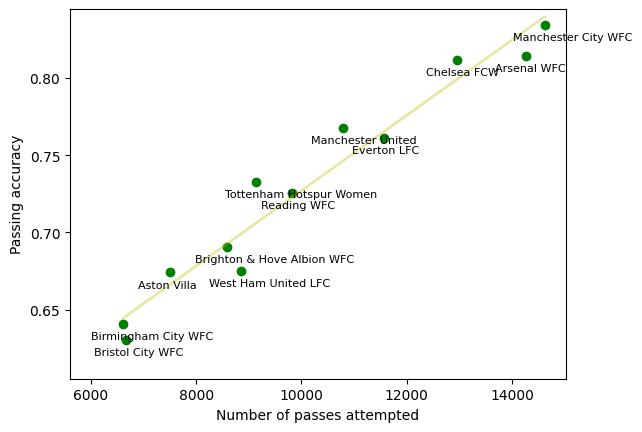

In [9]:
pass_teams = passing.pivot_table(index="possession_team", columns="pass_outcome", values="index", aggfunc='count')
pass_teams['Incomplete'] = pass_teams[['Incomplete', 'Injury Clearance', 'Out', 'Pass Offside', 'Unknown']].fillna(0).astype(int).sum(1)
pass_teams['Total'] = pass_teams[['Complete', 'Incomplete']].sum(1)
pass_teams['Accuracy'] = pass_teams['Complete'] / pass_teams['Total']
pass_teams = pass_teams[['Complete', 'Incomplete', 'Total', 'Accuracy']]
#print(pass_teams.head())

x = pass_teams['Total']
y = pass_teams['Accuracy']

fig, ax = plt.subplots()
ax.scatter(x, y, c=['g'])
ax.set_xlim(x.min()-1000)
ax.set_ylim(y.min()-0.025)

m, b = np.polyfit(x, y, 1)
ax.plot(x, x*m+b, '-y', alpha=0.35)

for i, txt in enumerate(pass_teams.index):
    ax.annotate(txt, (pass_teams['Total'][i]-600, pass_teams['Accuracy'][i]-0.01), fontsize=8)

ax.set_xlabel('Number of passes attempted')
ax.set_ylabel('Passing accuracy');

In [10]:
match_id = passing['match_id'].unique()[0]
match_passes = passing[passing['match_id'] == match_id]

# All passes that arrived to a recipient
counts = match_passes[['player', 'pass_recipient', 'index']].dropna()
counts = counts.groupby(by=['player', 'pass_recipient']).agg({'index':['count']})
counts = counts.droplevel(0, axis=1)
counts.reset_index(inplace=True)
counts.rename(columns={'pass_recipient':'recipient', 'count':'n_passes'}, inplace=True)
counts.head()

,player,recipient,n_passes
0,Anita Amma Ankyewah Asante,Asmita Ale,2
1,Anita Amma Ankyewah Asante,Chloe Arthur,2
2,Anita Amma Ankyewah Asante,Elisha N''Dow,1
3,Anita Amma Ankyewah Asante,Freya Gregory,1
4,Anita Amma Ankyewah Asante,Mana Iwabuchi,1


In [11]:
teams = list(match_passes['team'].unique())
h, a = teams

locations = match_passes[['team', 'player', 'location']]
xy = pd.DataFrame(locations['location'].to_list(), columns=['x', 'y'])
locations = pd.concat([locations, xy], axis=1).dropna().reset_index(drop=True).drop(columns=['location'])
locations = locations.groupby(['team', 'player']).agg({'x':'mean', 'y':'mean'})
locations.reset_index(inplace=True)

In [12]:
all_passes = pd.merge(counts, locations, how='left', on='player')
all_passes.rename(columns={'x':'x_start', 'y':'y_start'}, inplace=True)
all_passes = pd.merge(all_passes, locations, how='left', left_on='recipient', right_on='player')
all_passes.drop(columns=['player_y', 'team_y'], inplace=True)
all_passes.rename(columns={'player_x':'player', 'team_x':'team', 'x':'x_end', 'y':'y_end'}, inplace=True)
all_passes

,player,recipient,n_passes,team,x_start,y_start,x_end,y_end
0,Anita Amma Ankyewah Asante,Asmita Ale,2,Aston Villa,30.728571,44.457143,49.055263,71.455263
1,Anita Amma Ankyewah Asante,Chloe Arthur,2,Aston Villa,30.728571,44.457143,54.219048,41.552381
2,Anita Amma Ankyewah Asante,Elisha N''Dow,1,Aston Villa,30.728571,44.457143,55.650000,56.837500
3,Anita Amma Ankyewah Asante,Freya Gregory,1,Aston Villa,30.728571,44.457143,37.433333,6.333333
4,Anita Amma Ankyewah Asante,Mana Iwabuchi,1,Aston Villa,30.728571,44.457143,58.705556,45.305556
...,...,...,...,...,...,...,...,...
222,Vivianne Miedema,Jordan Nobbs,2,Arsenal WFC,85.128205,28.058974,84.394118,24.995588
223,Vivianne Miedema,Katie McCabe,11,Arsenal WFC,85.128205,28.058974,78.036458,13.625000
224,Vivianne Miedema,Leah Williamson,5,Arsenal WFC,85.128205,28.058974,53.086792,58.333019
225,Vivianne Miedema,Lia Wälti,1,Arsenal WFC,85.128205,28.058974,61.700000,39.023596


In [13]:
xis = sb.events(match_id=match_id, split=True)['starting_xis']
h_lineup = xis[xis['team'] == h].loc[:,['tactics']].values
h_lineup = [p['player']['name'] for p in h_lineup[0][0]['lineup']]

a_lineup = xis[xis['team'] == a].loc[:,['tactics']].values
a_lineup = [p['player']['name'] for p in a_lineup[0][0]['lineup']]

In [14]:
home_passes = all_passes[all_passes['player'].isin(h_lineup)]
away_passes = all_passes[all_passes['player'].isin(a_lineup)]
home_passes.shape, away_passes.shape

((117, 8), (76, 8))

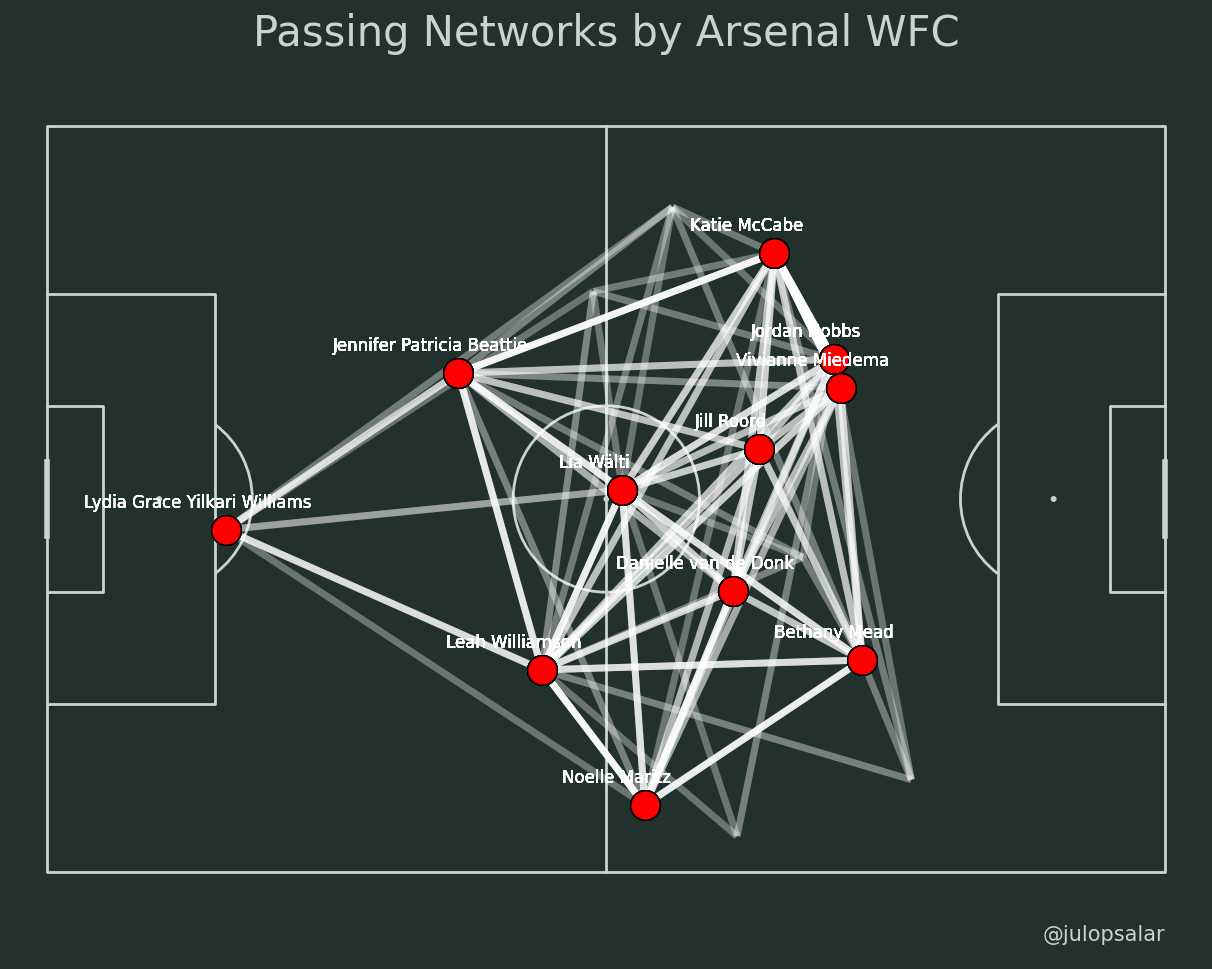

In [15]:
MIN_TRANSPARENCY = 0.3
color = np.array(to_rgba('white'))
color = np.tile(color, (len(home_passes), 1))
c_transparency = home_passes.n_passes / home_passes.n_passes.max()
c_transparency = (c_transparency * (1 - MIN_TRANSPARENCY)) + MIN_TRANSPARENCY
color[:, 3] = c_transparency

pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
fig, axs = pitch.grid(figheight=10, title_height=0.08, endnote_space=0, axis=False, 
                      title_space=0, grid_height=0.82, endnote_height=0.05)

fig.set_facecolor("#22312b")

pass_lines = pitch.lines(home_passes.x_start, home_passes.y_start,
                         home_passes.x_end, home_passes.y_end, #lw=home_passes.width+0.5,
                         color=color, zorder=1, ax=axs['pitch'])

pass_nodes = pitch.scatter(home_passes.x_start, home_passes.y_start, s=450,
                           color='red', edgecolors='black', linewidth=1, alpha=1, ax=axs['pitch'])

for index, row in home_passes.iterrows():
    pitch.annotate(row.player, xy=(row.x_start-3, row.y_start-3), c='white', va='center',
                   ha='center', size=12, ax=axs['pitch'])
    
# endnote /title
axs['endnote'].text(1, 0.5, '@julopsalar', color='#c7d5cc',
                    va='center', ha='right', fontsize=15)

axs['endnote'].set_xlim(0, 1)
axs['endnote'].set_ylim(0, 1)

axs['title'].text(0.5, 0.7, f'Passing Networks by {h}', color='#c7d5cc',
                  va='center', ha='center', fontsize=30)
#axs['title'].text(0.5, 0.25, 'First Half of The Game', color='#c7d5cc',
#                  va='center', ha='center', fontsize=18)
plt.savefig('Passing Networks.png', dpi=300, bbox_inches='tight')
plt.show()

# Shot Map

In [16]:
match_shots = shoting[shoting['match_id'] == match_id]
match_shots.head()

,id,index,period,timestamp,minute,second,type,possession,possession_team,play_pattern,...,shot_aerial_won,shot_one_on_one,shot_open_goal,out,shot_deflected,shot_saved_off_target,shot_redirect,off_camera,shot_follows_dribble,shot_saved_to_post
0,9076cf40-9179-432a-9663-94cbbff6ce74,92,1,00:01:27.151,1,27,Shot,5,Aston Villa,From Keeper,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,b3a321bb-597c-49da-b039-21cf7eeb6095,278,1,00:05:21.756,5,21,Shot,11,Arsenal WFC,From Corner,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,87d44b8c-955b-4341-a3c3-c6665fdb37bd,338,1,00:06:57.808,6,57,Shot,14,Arsenal WFC,From Throw In,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ac4a3cfb-cad7-4ebf-8fb1-3e97075fd13e,460,1,00:10:06.492,10,6,Shot,20,Arsenal WFC,From Throw In,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,512cd927-1ddf-4921-9d2b-38658736aefe,609,1,00:14:50.232,14,50,Shot,27,Arsenal WFC,From Corner,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


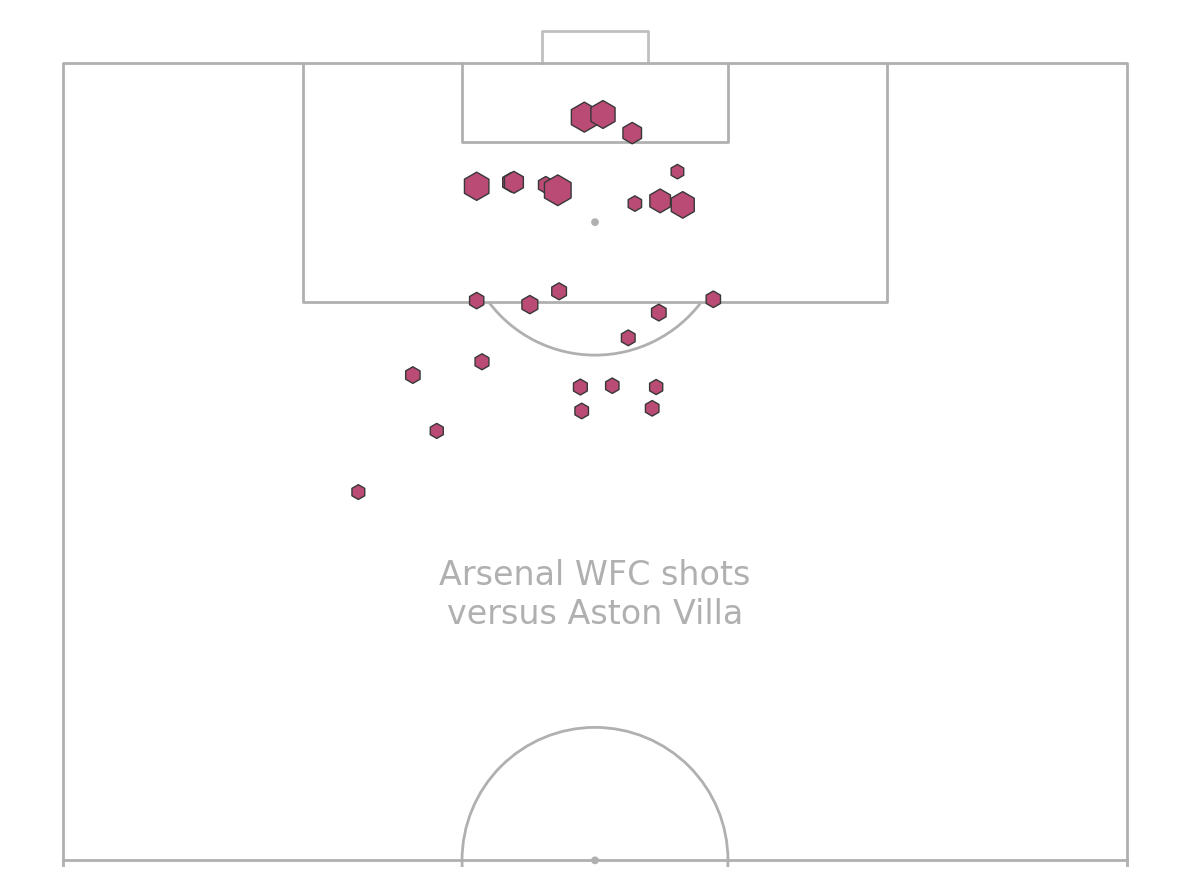

In [17]:
from mplsoccer import VerticalPitch

home_shots = match_shots[match_shots['team'] == h].reset_index(drop=True)
home_shots = home_shots[[ 'team', 'player', 'position', 'location', 'match_id', 
       'shot_statsbomb_xg', 'shot_end_location', 'shot_key_pass_id',
       'shot_outcome', 'shot_type', 'shot_body_part', 'shot_technique']]
home_shots[['x', 'y']] = pd.DataFrame(home_shots['location'].tolist(), index=home_shots.index)

pitch = VerticalPitch(pad_bottom=0.5,  # pitch extends slightly below halfway line
                      half=True,  # half of a pitch
                      goal_type='box',
                      goal_alpha=0.8)  # control the goal transparency
fig, ax = pitch.draw(figsize=(12, 10))

sc = pitch.scatter(home_shots.x, home_shots.y,
                   # size varies between 100 and 1000 (points squared)
                   s=(home_shots.shot_statsbomb_xg * 900) + 100,
                   c='#b94b75',  # color for scatter in hex format
                   edgecolors='#383838',  # give the markers a charcoal border
                   # for other markers types see: https://matplotlib.org/api/markers_api.html
                   marker='h',
                   ax=ax)
txt = ax.text(x=40, y=80, s=f'{h} shots\nversus {a}',
              size=24,
              # here i am using a downloaded font from google fonts instead of passing a fontdict fontproperties=fm_rubik.prop, 
              color=pitch.line_color,
              va='center', ha='center')
